In [1]:
library(tidyverse)
library(ggplot2)
library(papaja)
library(WaveletComp)
library(patchwork)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: tinylabels


Attaching package: ‘WaveletComp’


The following object is masked from ‘package:ggplot2’:

    arrow




In [2]:
options(repr.plot.width = 8)
options(repr.plot.height = 6)

In [3]:
#| label: load-data
#| include: false

data.names <-
  c(list.files('../Data/Cohort_1', full.names = T, pattern = '*.csv$'),
    list.files('../Data/Cohort_2', full.names = T, pattern = '*.csv$'))
data.files <- read_csv(data.names)

Rows: 153142 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): PART_ID, Trial_type, Stim_letter, Key_pressed, letter_choose
dbl (5): Trial_no, CSI, Rt, Stimulus Time, nDropped
lgl (1): Corr

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
data.names

[1] "../Data/Cohort_1/156K28S1_868_beh.csv"    
 [2] "../Data/Cohort_1/156K28S2_921_beh.csv"    
 [3] "../Data/Cohort_1/156K28S3_601_beh.csv"    
 [4] "../Data/Cohort_1/156K28S4_481_beh.csv"    
 [5] "../Data/Cohort_1/157K25S1_989_beh.csv"    
 [6] "../Data/Cohort_1/157K25S2_517_beh.csv"    
 [7] "../Data/Cohort_1/157K25S3_989_beh.csv"    
 [8] "../Data/Cohort_1/157K25S4_726_beh.csv"    
 [9] "../Data/Cohort_1/158K23S1_686_beh.csv"    
[10] "../Data/Cohort_1/158K23S2_813_beh.csv"    
[11] "../Data/Cohort_1/158K23S3_960_beh.csv"    
[12] "../Data/Cohort_1/158K23S4_608_beh.csv"    
[13] "../Data/Cohort_1/159K21S1_998_beh.csv"    
[14] "../Data/Cohort_1/159K21S2_612_beh.csv"    
[15] "../Data/Cohort_1/159K21S3_330_beh.csv"    
[16] "../Data/Cohort_1/159K21S4_636_beh.csv"    
[17] "../Data/Cohort_1/160K25S1_740_beh.csv"    
[18] "../Data/Cohort_1/160K25S2_743_beh.csv"    
[19] "../Data/Cohort_1/160K25S3_967_beh.csv"    
[20] "../Data/Cohort_1/160K25S4_779_beh.csv"    
[21] "../Data/Cohort_1/161M19S1_621_beh.csv"    
[22] "../Data/Cohort_1/161M19S2_815_beh.csv"    
[23] "../Data/Cohort_1/161M19S3_917_beh.csv"    
[24] "../Data/Cohort_1/161M19S4_350_beh.csv"    
[25] "../Data/Cohort_1/162K27S1_332_beh.csv"    
[26] "../Data/Cohort_1/162K27S2_359_beh.csv"    
[27] "../Data/Cohort_1/162K27S3_462_beh.csv"    
[28] "../Data/Cohort_1/162K27S4_135_beh.csv"    
[29] "../Data/Cohort_1/163K34S1_837_beh.csv"    
[30] "../Data/Cohort_1/163K34S2_858_beh.csv"    
[31] "../Data/Cohort_1/163K34S3_252_beh.csv"    
[32] "../Data/Cohort_1/163K34S4_285_beh.csv"    
[33] "../Data/Cohort_2/AC-K-24K24S1_728_beh.csv"
[34] "../Data/Cohort_2/AC-K-24K24S2_533_beh.csv"
[35] "../Data/Cohort_2/AC-K-26K26S1_814_beh.csv"
[36] "../Data/Cohort_2/AC-K-26K26S2_346_beh.csv"
[37] "../Data/Cohort_2/AK-K-19K19S1_000_beh.csv"
[38] "../Data/Cohort_2/AK-K-19K19S2_000_beh.csv"
[39] "../Data/Cohort_2/AK-K-23K23S1_108_beh.csv"
[40] "../Data/Cohort_2/AK-K-23K23S2_354_beh.csv"
[41] "../Data/Cohort_2/AM-K-22K21S1_544_beh.csv"
[42] "../Data/Cohort_2/AM-K-22K22S2_471_beh.csv"
[43] "../Data/Cohort_2/JJ-K-32K32S1_802_beh.csv"
[44] "../Data/Cohort_2/JJ-K-32K32S2_589_beh.csv"
[45] "../Data/Cohort_2/JK-K-21K21S1_241_beh.csv"
[46] "../Data/Cohort_2/JK-K-21K21S2_758_beh.csv"
[47] "../Data/Cohort_2/JL-K-20K20S1_373_beh.csv"
[48] "../Data/Cohort_2/JL-K-20K20S2_775_beh.csv"
[49] "../Data/Cohort_2/JP-M-23M23S1_995_beh.csv"
[50] "../Data/Cohort_2/JP-M-23M23S2_818_beh.csv"
[51] "../Data/Cohort_2/JR-K-22K22S1_304_beh.csv"
[52] "../Data/Cohort_2/JR-K-22K22S2_793_beh.csv"
[53] "../Data/Cohort_2/JS-M-24M24S1_884_beh.csv"
[54] "../Data/Cohort_2/JS-M-24M24S2_925_beh.csv"
[55] "../Data/Cohort_2/KM-K-22K22S1_322_beh.csv"
[56] "../Data/Cohort_2/KM-K-22K22S2_591_beh.csv"
[57] "../Data/Cohort_2/KN-M-23M23S1_924_beh.csv"
[58] "../Data/Cohort_2/KN-M-23M23S2_678_beh.csv"
[59] "../Data/Cohort_2/KS-K-21K21S1_331_beh.csv"
[60] "../Data/Cohort_2/KS-K-21K21S2_420_beh.csv"
[61] "../Data/Cohort_2/LZ-K-20K20S1_469_beh.csv"
[62] "../Data/Cohort_2/LZ-K-20K20S2_818_beh.csv"
[63] "../Data/Cohort_2/MG-M-33M33S1_471_beh.csv"
[64] "../Data/Cohort_2/MG-M-33M33S2_951_beh.csv"
[65] "../Data/Cohort_2/MP-K-21K21S1_789_beh.csv"
[66] "../Data/Cohort_2/MP-k-21K21S2_726_beh.csv"
[67] "../Data/Cohort_2/MP-K-23K23S1_744_beh.csv"
[68] "../Data/Cohort_2/MP-K-23K23S2_876_beh.csv"
[69] "../Data/Cohort_2/MW-K-33K33S1_740_beh.csv"
[70] "../Data/Cohort_2/MW-K-33K33S2_480_beh.csv"
[71] "../Data/Cohort_2/NK-M-22M22S1_956_beh.csv"
[72] "../Data/Cohort_2/NK-M-22M22S2_889_beh.csv"
[73] "../Data/Cohort_2/PO-M-22M22S1_938_beh.csv"
[74] "../Data/Cohort_2/PO-M-22M22S2_000_beh.csv"
[75] "../Data/Cohort_2/RC-M-23M23S1_688_beh.csv"
[76] "../Data/Cohort_2/RC-M-23M23S2_924_beh.csv"
[77] "../Data/Cohort_2/SK-K-24K24S1_826_beh.csv"
[78] "../Data/Cohort_2/SK-K-24K24S2_529_beh.csv"
[79] "../Data/Cohort_2/WZ-K-21K21S1_470_beh.csv"
[80] "../Data/Cohort_2/WZ-K-21K21S2_961_beh.csv"
[81] "../Data/Cohort_2/ZC-K-23K23S1_230_beh.csv"
[82] "../Data/Cohort_2/ZC-K-23K2

In [5]:
#| include: false
data.aggr <-
  data.files |>
  mutate(PART_ID = str_sub(PART_ID, 1, 6)) |>
  filter(Trial_type == "experiment", Rt > 0.0) |> # Experiment and no timeout
  select(PART_ID,CSI, Corr) |>
  mutate(t = CSI * 8.3) |>
  group_by(PART_ID, t) |>
  summarise(mean_corr = 100.0 * mean(Corr)) 

`summarise()` has grouped output by 'PART_ID'. You can override using the
`.groups` argument.


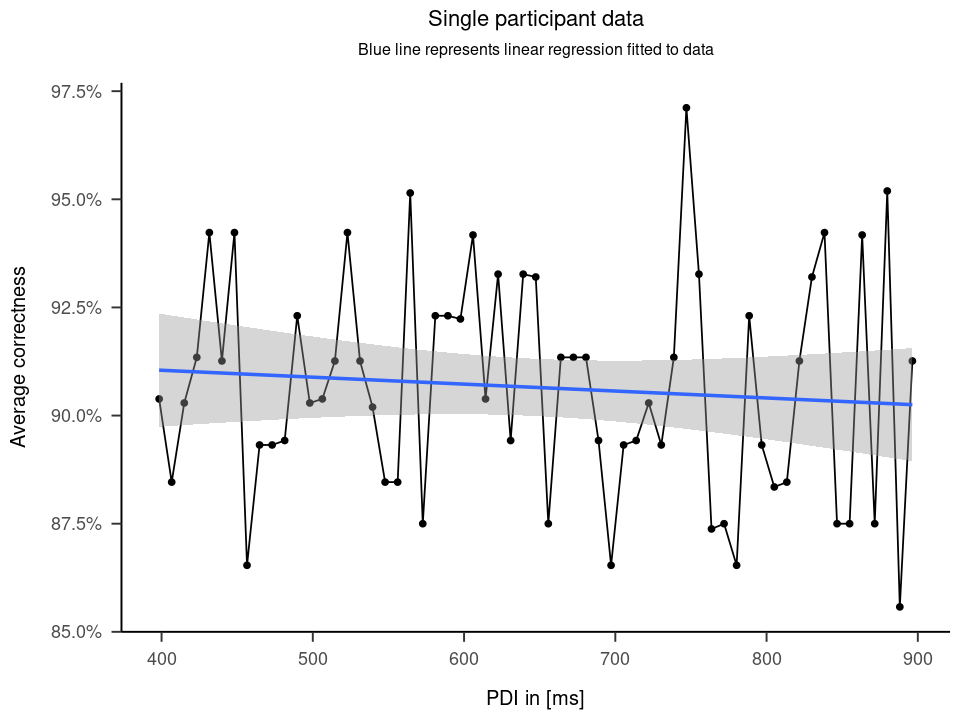

In [6]:
#| echo: false
data.aggr |> 
  filter(PART_ID == "156K28") |>
  ggplot(mapping = aes(x=t, y=mean_corr/100.0)) +
  geom_point() +
  geom_line() + 
  geom_smooth(method='lm', formula = y ~ x) +
  ggtitle("Single participant data", 
          subtitle = "Blue line represents linear regression fitted to data") + 
  scale_y_continuous(labels = scales::percent) +
  labs(x = "PDI in [ms]", y = "Average correctness") +
  theme_apa()

## Ljubng box formal testng 

In [7]:
# Group by participant and nest data
nested_data <- data.aggr %>%
  arrange(PART_ID, t) %>%
  group_by(PART_ID) %>%
  nest()

# Define a function to detrend and perform the Ljung-Box test
process_data <- function(df) {
  # Polynomial Detrending
  fit <- lm(mean_corr ~ poly(t, 2), data = df)
  df$detrended_mean_corr <- residuals(fit)
  
  # Ljung-Box test on the detrended series
  test_result <-
    Box.test(df$detrended_mean_corr, type = "Ljung-Box")
  
  # Return a tibble with the results
  tibble(
    p_value = test_result$p.value,
    statistic = test_result$statistic,
    lag = test_result$parameter,
    method = test_result$method
  )
}

# Apply the function to each nested dataframe
ljung_box_results <- nested_data %>%
  mutate(results = map(data, process_data)) %>%
  select(-data) %>%
  unnest(results) %>%
  ungroup()

# Adjust p-values for multiple comparisons
ljung_box_results <- ljung_box_results %>%
  mutate(adjusted_p_value = p.adjust(p_value, method = "BH"))


# View the results
print(ljung_box_results)

# A tibble: 33 × 6
   PART_ID p_value statistic   lag method         adjusted_p_value
   <chr>     <dbl>     <dbl> <dbl> <chr>                     <dbl>
 1 156K28  0.488      0.480      1 Box-Ljung test            0.966
 2 157K25  0.337      0.921      1 Box-Ljung test            0.966
 3 158K23  0.588      0.293      1 Box-Ljung test            0.966
 4 159K21  0.586      0.297      1 Box-Ljung test            0.966
 5 160K25  0.892      0.0186     1 Box-Ljung test            0.974
 6 160M25  0.313      1.02       1 Box-Ljung test            0.966
 7 161M19  0.887      0.0202     1 Box-Ljung test            0.974
 8 162K27  0.254      1.30       1 Box-Ljung test            0.966
 9 163K34  0.00742    7.17       1 Box-Ljung test            0.245
10 AC-K-2  0.655      0.200      1 Box-Ljung test            0.966
# ℹ 23 more rows


Benjamini-Hochberg (BH) is more suitable for exploratory research where you are dealing with a large number of independent tests

In [8]:
# How many participants has significant values 
ljung_box_results |> 
  summarise(
  Significant_Raw = sum(p_value < 0.05),
  Significant_Adjusted = sum(adjusted_p_value < 0.05))

Significant_Raw,Significant_Adjusted
<int>,<int>
1,0


## Wavelet Transform

In [47]:
# Wybieramy osobę badaną do wizualizacji
random_part_id <- data.aggr$PART_ID |> unique() |> sample(1)
# random_part_id <- "97K21" # całkiem dużo widać
# random_part_id <- "59K22" # też sporo, acz nieco gorzej
# random_part_id <- "106M23" # trzy wyraźne wyspy 
# random_part_id <- "146M21" # marnizna raczej
# random_part_id <- "40K24" # globalna wolna fala powyżej 200ms i jeden peak
# random_part_id <- "37K24" # jeden peak, reszta płaska
# random_part_id <- "36K20" # dwa peaki, reszta płaska
# random_part_id <- "91M22" # trzy spore peaki, troche płaska reszta
# random_part_id <- "118K23" # idealna wolna fala na całości 
# random_part_id <- "96K22" # płasciutko i zawirowanie na końcu 
# random_part_id <- "75K22" # wolna faza na całości, trochę szumu na początku
print(random_part_id)

[1] "MW-K-3"


In [48]:
# detrending poprzez odjęcie wielomianu stopnia 2
my.data <- data.aggr |> filter(PART_ID == random_part_id) |> arrange(t)
fit <- lm(mean_corr ~ poly(t, 2), data = my.data)
my.data$mean_corr <- residuals(fit)

my.data <- data.frame(time = my.data$t, x = my.data$mean_corr)

my.w <- analyze.wavelet(my.data, "x",
loess.span = 0,
dt = 1, dj = 1/60,
lowerPeriod = 1,
upperPeriod = 16,
make.pval = TRUE, n.sim = 200)

Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 date.format date.tz 


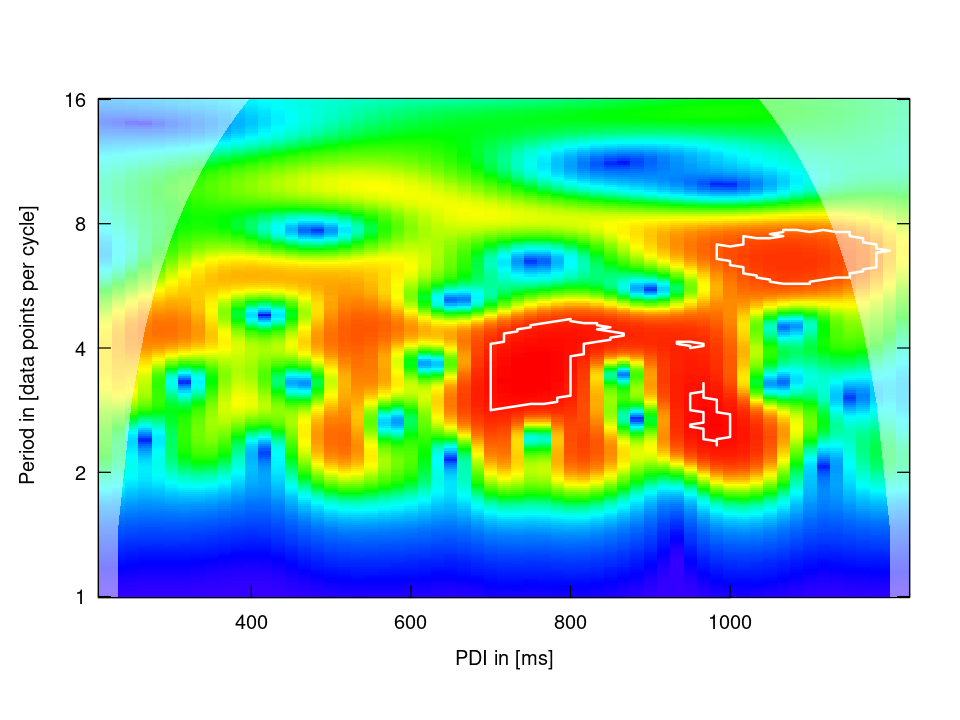

In [49]:
# Z JAKIEGOŚ DZIWNEGO POWODU P VALUE JEEST USTALONE NA P=0.1
wt.image(
  siglvl = 0.05, 
  plot.ridge = FALSE,
  plot.legend = FALSE,
  my.w,
  color.key = "quantile",
  n.levels = 250,
  # legend.params = list(lab = "wavelet power levels", mar = 4.7),
  timelab = "PDI in [ms]",
  periodlab = " Period in [data points per cycle]",
  spec.time.axis = list(at = seq(0, 48, by = 12),
                        labels = seq(200, 1000, by = 200))
  # spec.period.axis = list(at = c(1, 2, 4, 8, 16), labels = c(16, 8, 4, 2, 1))

)

Your input object class is 'analyze.wavelet'...
Your time series 'x' will be reconstructed... 
Starting the reconstruction process...
Original (detrended) and reconstructed series are being plotted...
Class attributes are accessible through following names:
series rec.waves loess.span lvl only.coi only.sig siglvl only.ridge rnum.used rescale dt dj Period Scale nc nr axis.1 axis.2 date.format date.tz 


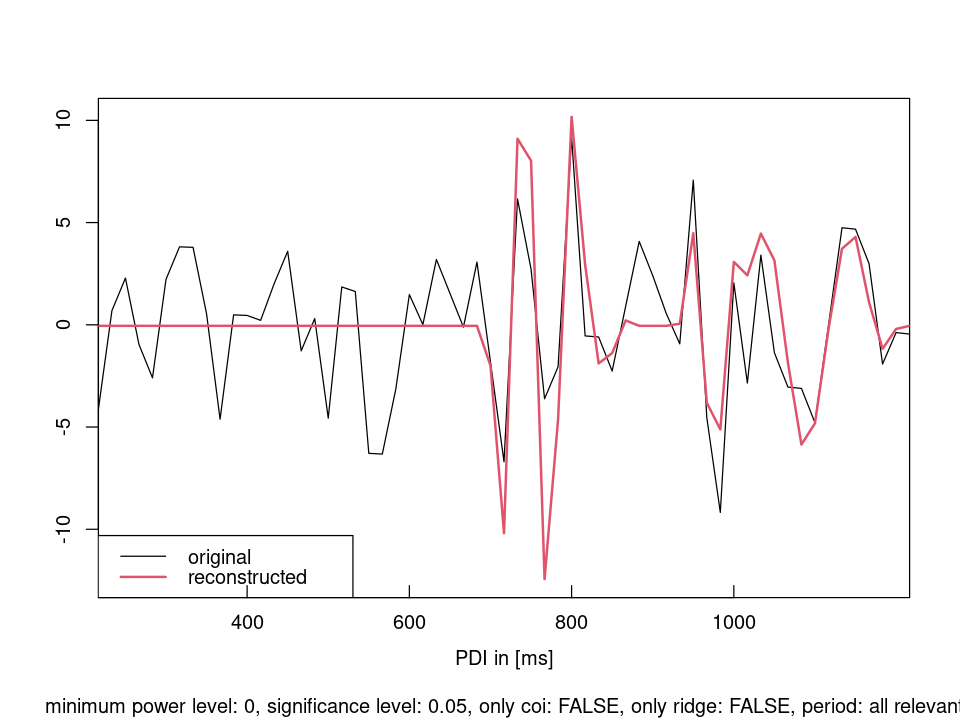

In [50]:
reconstruct(
  my.w,
  plot.waves = FALSE,
  lwd = c(1, 2),
  legend.coords = "bottomleft",
  only.sig = TRUE,
  spec.time.axis = list(at = seq(0, 48, by = 12),
                        labels = seq(200, 1000, by = 200)),
    timelab = "PDI in [ms]"
)

## Peridogram

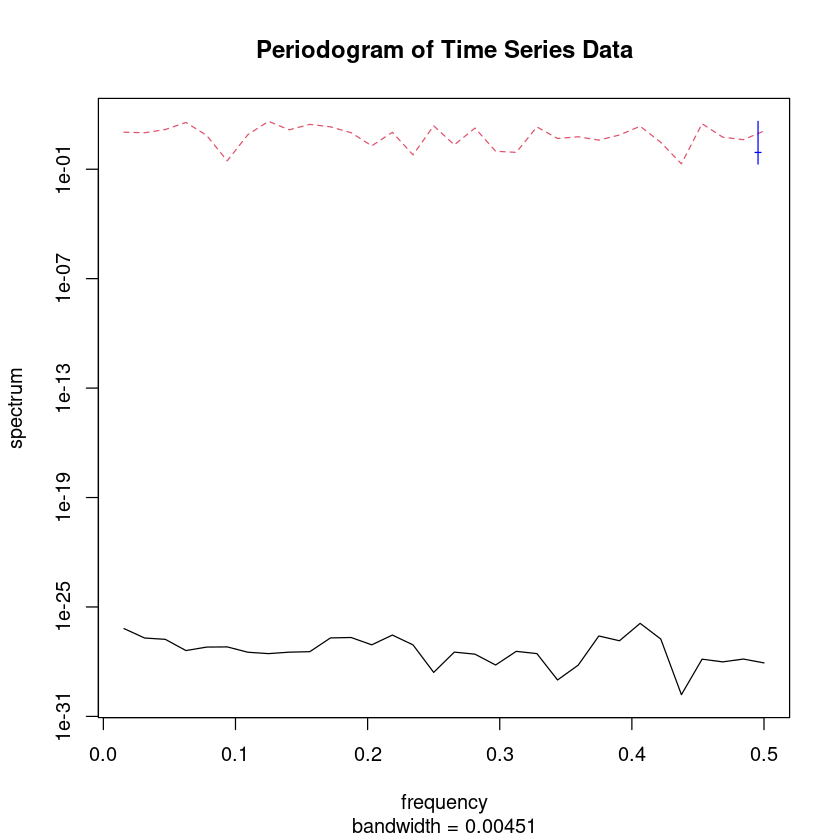

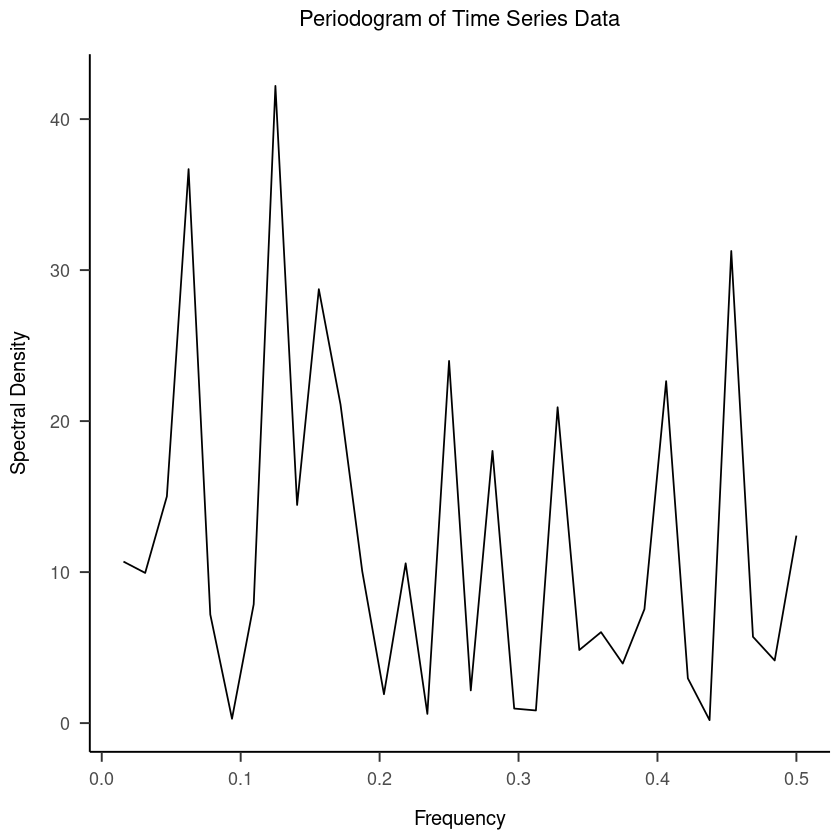

In [75]:
# Plot the periodogram
spectrum(my.data, main = "Periodogram of Time Series Data")

# If you prefer a ggplot2 style plot, you can extract the spectral data and plot it manually
spectral_data <- spectrum(my.data$x, plot = FALSE)
spectral_df <-
  as_tibble(list(frequency = spectral_data$freq, spectrum = spectral_data$spec))

# Plot using ggplot2
ggplot(spectral_df, aes(x = frequency, y = spectrum)) +
  geom_line() +
  theme_apa() +
  labs(x = "Frequency", y = "Spectral Density", title = "Periodogram of Time Series Data")